# Boosting, the Basics

The idea of boosting is to start with "weak learners" and then "boost them" by combining them one after another

A weak learner is one what we are pretty sure is underfitted,  or lacking in predictive power.  Typically, we will use stub trees, with only on node

In Bagging,   we are using the models in parallel with one another, so the output is an average over many predictors

In Boosting, we are using the models in series, or sequence with one another, so the result is a sum of individual predictions

See

Chapter 7 of "Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow, 2nd Edition" by Geron, published by O'Reilly

Also see the scikit learn website

updated/checked 1/17/2023

## AdaBoost

AdaBoost is an algorithm that starts with a base classifier, something like a decision tree, and trains it on data.   The predictions of this model are examined and
the results which are misclassified have their weights increased.    What this means is that the error is a weighted sum of the individual errors on each (X,y) pairing.

Models are trained sequentially, with each having a weight set by the previous model output.

The decision is then made using the vote of all the trained classifiers

In [1]:
# we'll use the wine classification data set

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

We will use the Wine data set

In [2]:
from sklearn.datasets import load_wine
wine=load_wine()
X=wine['data']
y=wine['target']

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
# what are the features/predictors?
features=wine['feature_names']
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
# targets are categories of wine type
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:


X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

### Here is the Adaboost

-we are using Decision trees of length 1- these are called stubs

-we are constructing 200 trees

-the learning rate controls how fast the variable weights increase

-the algorithm used in updating the weights is called SAMME.R,   

   Stagewise Additive Modeling using a Multiclass Exponential loss function,   .R means real and indicates use of the class probabilities, note the class in the algorithm
   
The Adaboost method does not run as easily in parallel as the random forest does,  as each predictor relies on the output of the previous predictor

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

y_pred=ada_clf.predict(X_test)

print (accuracy_score(y_test,y_pred))

0.9722222222222222


### Question/Action

What are the hyperparameters in this classifier?  

Try running this with the n_estimators as low as 3

class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [16]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=3,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

y_pred=ada_clf.predict(X_test)

print (accuracy_score(y_test,y_pred))

0.9444444444444444


In [17]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

y_pred=ada_clf.predict(X_test)

print (accuracy_score(y_test,y_pred))

0.9722222222222222


Try a random forest for comparison

In [18]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print (accuracy_score(y_test,y_pred_rf))

0.9722222222222222


# Gradient Boosting

In this method, we again use weak predictors,  but now we use each weak predictor to create a predictor of the residuals (error) of the previous predictor

subsample=1 means each fitting of the weak learner uses all the data,    subsample<1 gives a stochastic gradient boost

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1, max_depth=1)

gb_clf.fit(X_train, y_train)

y_pred_gb = rnd_clf.predict(X_test)
print (accuracy_score(y_test,y_pred_gb))

0.9722222222222222


In [22]:
#stochastic version

gb_clf=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=0.8, max_depth=1)

gb_clf.fit(X_train, y_train)

y_pred_gb = rnd_clf.predict(X_test)
print (accuracy_score(y_test,y_pred_gb))

0.9722222222222222


#Question/Task

Look up GradientBoosting in sklearn

What are the hyperparameters?

class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [23]:
!pip install eli5
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=0130de3a89dc58a0ba29df71da2a6688067958b31c604ceeb140349c350817fe
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.3 MB/s eta 0:00:00


In [24]:
import eli5
from eli5.sklearn import PermutationImportance

In [25]:
perm = PermutationImportance(gb_clf, random_state=1).fit(X_train, y_train)

In [26]:
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.1028 ± 0.0246,flavanoids
0.0549 ± 0.0187,proline
0.0521 ± 0.0113,color_intensity
0.0028 ± 0.0069,alcalinity_of_ash
0 ± 0.0000,od280/od315_of_diluted_wines
0 ± 0.0000,hue
0 ± 0.0000,proanthocyanins
0 ± 0.0000,nonflavanoid_phenols
0 ± 0.0000,total_phenols
0 ± 0.0000,magnesium


##  Early Stopping

Gradient Boosted methods can be prone to overfitting in some cases

One tactic to defeat overfitting is to use "early stopping" of the training process.  To do this, we start with a small number of steps, and compute the error measure,
then add more training steps and recompute.   We stop the training when then cross validation results are no longer improving.

In the example below,   it did some to work better using subsample =0.8,   meaning a stochastic gradient method

Note that early stopping also works well with neural net training

In [27]:
# early stopping

# the warm start method means that successive models start where the previous model stopping training,  rather
# than from some random initial condition
gbrt = GradientBoostingClassifier(max_depth=1, warm_start=True, learning_rate=0.1, subsample=0.8)


# we will use accuracy as the loss function.   Cross-entropy would be a better choice here
# here we assume an initial rate of 0% correct and watch for improvement

min_val_error = 0
error_going_up = 0

# we will use up to 120 estimateors

for n_estimators in range(1, 120):

    # train the model

    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)

    # get the prediction

    val_error = accuracy_score(y_test, y_pred)

    # print out the error
    print(val_error)

    # check to see if the error has improved

    if val_error > min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping


0.5555555555555556
0.8888888888888888
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.9722222222222222


## Question/Task

Create a better early stepping gradient boost routing in a cell below

-Modify the code above to use cross entropy,  look up log_loss in sklearn and replace the accuracy listed above with log_loss

-Modify the code to print out the number of estimators,  the log_loss and the accuracy at each step,   get these all on one line

In [37]:
# early stopping
from sklearn.metrics import log_loss


# the warm start method means that successive models start where the previous model stopping training,  rather
# than from some random initial condition
gbrt = GradientBoostingClassifier(max_depth=1, warm_start=True, learning_rate=0.1, subsample=0.8)


# we will use accuracy as the loss function.   Cross-entropy would be a better choice here
# here we assume an initial rate of 0% correct and watch for improvement

min_val_error = 0
error_going_up = 0

# we will use up to 120 estimateors
print('logistic_loss, ', 'accuracy, ', 'n_estimators')


for n_estimators in range(1, 120):

    # train the model

    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict_proba(X_test)

    # get the prediction

    logistic_loss = log_loss(y_test, y_pred)

    y_pred = gbrt.predict(X_test)
    val_error = accuracy_score(y_test, y_pred)


    # print out the error
    print(logistic_loss, val_error, gbrt.n_estimators)

    # check to see if the error has improved

    if val_error > min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping




logistic_loss,  accuracy,  n_estimators
0.9797102906330978 0.6388888888888888 1
0.8802773769728839 0.8333333333333334 2
0.7914732527209744 0.8333333333333334 3
0.7254232592025828 0.9166666666666666 4
0.6583743564679019 0.8888888888888888 5
0.6021235842894275 1.0 6
0.5570355124787327 0.9722222222222222 7
0.5090729734211438 0.9722222222222222 8
0.468343400650748 1.0 9
0.4303532627102283 1.0 10
0.4020543904921236 1.0 11


## XGBoost

This is the best current implementation of gradient boosting available,  it is often a winning tool in Kaggle contests

conda install -c conda-forge xgboost

Note- it looks like there is a version of xgboost that makes use of the gpu

In [47]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=1, learning_rate=0.1, subsample=0.8)

min_val_error = 0
error_going_up = 0

# we will use up to 120 estimateors
print('logistic_loss, ', 'accuracy, ', 'n_estimators')


for n_estimators in range(1, 120):

    # train the model

    xgb_model.n_estimators = n_estimators
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict_proba(X_test)

    # get the prediction

    logistic_loss = log_loss(y_test, y_pred)

    y_pred = xgb_model.predict(X_test)
    val_error = accuracy_score(y_test, y_pred)


    # print out the error
    print(logistic_loss, val_error, xgb_model.n_estimators)

    # check to see if the error has improved

    if val_error > min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

logistic_loss,  accuracy,  n_estimators
1.0039651593685306 0.9166666666666666 1
0.9256417641362703 0.9166666666666666 2
0.862389145058729 0.9444444444444444 3
0.7967707002187 0.9722222222222222 4
0.7467053282233296 0.9444444444444444 5
0.6919285745782541 0.9722222222222222 6
0.6477739546205641 0.9722222222222222 7
0.60382150136622 0.9722222222222222 8
0.5636126771382528 0.9722222222222222 9


## Question/Action

Look up xgboost and see what hyperparameters are available and if you can improve the performance of the model above

params = {
  "colsample_bynode": 0.8,
  "learning_rate": 1,
  "max_depth": 5,
  "num_parallel_tree": 100,
  "objective": "binary:logistic",
  "subsample": 0.8,
  "tree_method": "hist",
  "device": "cuda",
}

In [48]:
import shap

explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(X_test)

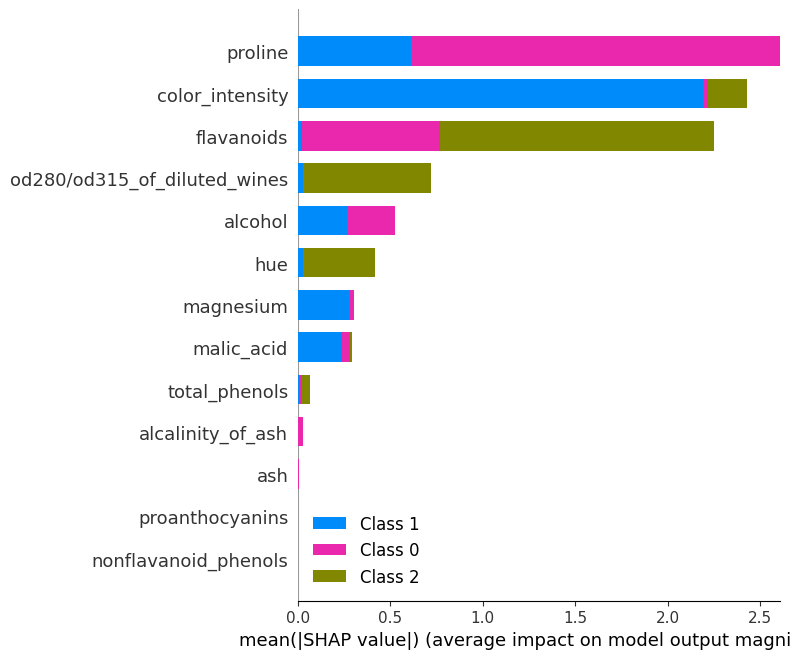

In [49]:
shap.summary_plot(shap_values, X_test, feature_names=features)

## Stacking,  or stacked generalization

This is a variant on voting, in which instead of a straight up vote, a predictor is used to predict the outcome using as inputs the outputs of many other models

In the example below,  we will use deslib in conjunction with a random forest,   instead of simply averaging the trees, DESLib will use the tree outputs as inputs and try
to form a better predictor than simply using the average.

sklearn does not have stacking tools

There is an independent package called DESlib that will do the job

pip install deslib

it doesn't install with conda,   not everything does.

In [8]:
!pip install deslib

In [7]:
!pip install numpy==1.22

ERROR: Operation cancelled by user


In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from deslib.des.knora_e import KNORAE

# Train a pool of 10 classifiers
pool_classifiers = RandomForestClassifier(n_estimators=10)
pool_classifiers.fit(X_train, y_train)

# Initialize the DES model
knorae = KNORAE(pool_classifiers)

# Preprocess the Dynamic Selection dataset (DSEL)
knorae.fit(X_train, y_train)

# Predict new examples:

y_pred_kn=knorae.predict(X_test)

print (accuracy_score(y_test,y_pred_kn))

1.0
